<h1 style="text-align: center">
<div style="color:   #FF4500; font-size: 60%">ATLAS INTERNSHIP - SUMMER 2024</div>
<span style="">Project: Campus Safety</span>
<div style="font-size: 60%;"><a href="https://police.illinois.edu/info/daily-crime-log/">https://police.illinois.edu/info/daily-crime-log/</a></div>
</h1>

<hr style="color:   #FF4500;">

## Section 1: Dataset

### Loading the Dataset

Now, let's load the dataset into a DataFrame for our analysis. The dataset is in CSV format and can be imported using the pandas library to work with the data.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil import parser

#Importing the daily crime log dataset of University of Illinois Urbana- Champaign
data= pd.read_csv("dailyCrimeLog.csv")
data

,Number,Reported Date/Time,Occurred From Date/Time,Location,Description,Disposition
0,2024-00006988,04/22/2024 16:19,03/31/2024 16:21,"51 E John St, Champaign",THEFT-<$500,Administratively Closed
1,2024-00006998,04/22/2024 18:02,04/22/2024 18:02,"1401 W Green St, Urbana",DISORDERLY CONDUCT-ALL OTHER,Administratively Closed
2,2024-00007034,04/23/2024 04:17,04/23/2024 04:00,"1804 S Neil St, Champaign",BURGLARY-BUILDING,"Cleared by Arrest, Juvenile"
3,2024-00007034,04/23/2024 04:17,04/23/2024 04:00,"1804 S Neil St, Champaign",CRIMINAL DAMAGE TO PROPERTY,"Cleared by Arrest, Juvenile"
4,2024-00007045,04/23/2024 09:34,04/22/2024 16:00,"1301 Springfield Av, Urbana",MOTOR VEHICLE THEFT,"Cleared by Arrest, Juvenile"
...,...,...,...,...,...,...
360,CSA24-088,6/3/24 13:19,FEBRUARY 2024 - MAY 2024,ON CAMPUS,STALKING,ADMIN CLOSED
361,FI24002716,6/5/24 5:50,6/5/24 5:50,"1301 SPRINGFIELD AV, URBANA",CRIMINAL DAMAGE,ADMIN CLOSED
362,CSA24-090,6/6/24 14:42,9/8/2023 UNKNOWN,ON CAMPUS RES HALL,RAPE,ADMIN CLOSED
363,CSA24-092,6/6/24 16:22,2020-2024 UNKNOWN,ON CAMPUS,STALKING,ADMIN CLOSED


#### DATA CLEANUP

I will be using DataFrame. dropna() to remove missing data from the data frame.

In [5]:
crime_data=pd.read_csv("dailyCrimeLog.csv")
#Clean up the reported date column
crime_data['Reported Date/Time'] = pd.to_datetime(crime_data['Reported Date/Time'],errors='coerce')
crime_data.dropna(subset=['Reported Date/Time'],inplace=True)

#Clean up the occured date column
crime_data['Occurred From Date/Time'] = pd.to_datetime(crime_data['Occurred From Date/Time'],errors='coerce')
crime_data.dropna(subset=['Occurred From Date/Time'],inplace=True)

#Clean up the location column
crime_data.dropna(subset=["Location"], inplace=True)

#Clean up the Description column
crime_data.dropna(subset=["Description"], inplace=True)

crime_data.head()

,Number,Reported Date/Time,Occurred From Date/Time,Location,Description,Disposition
0,2024-00006988,2024-04-22 16:19:00,2024-03-31 16:21:00,"51 E John St, Champaign",THEFT-<$500,Administratively Closed
1,2024-00006998,2024-04-22 18:02:00,2024-04-22 18:02:00,"1401 W Green St, Urbana",DISORDERLY CONDUCT-ALL OTHER,Administratively Closed
2,2024-00007034,2024-04-23 04:17:00,2024-04-23 04:00:00,"1804 S Neil St, Champaign",BURGLARY-BUILDING,"Cleared by Arrest, Juvenile"
3,2024-00007034,2024-04-23 04:17:00,2024-04-23 04:00:00,"1804 S Neil St, Champaign",CRIMINAL DAMAGE TO PROPERTY,"Cleared by Arrest, Juvenile"
4,2024-00007045,2024-04-23 09:34:00,2024-04-22 16:00:00,"1301 Springfield Av, Urbana",MOTOR VEHICLE THEFT,"Cleared by Arrest, Juvenile"


## Section 2: Exploratory Data Analysis

**Finding what hour has the most incidents**

Column names in the dataset:
Index(['Number', 'Reported Date/Time', 'Occurred From Date/Time', 'Location',
       'Description', 'Disposition', 'Occured_From_DateTime'],
      dtype='object')
Column names after adding 'Occurred_From_DateTime':
Index(['Number', 'Reported Date/Time', 'Occurred From Date/Time', 'Location',
       'Description', 'Disposition', 'Occured_From_DateTime',
       'Occurred_From_DateTime'],
      dtype='object')
The hour with the most incidents is: 17 with 26 incidents.


/var/folders/gd/h781n9p924d0rw9_v_srl5sh0000gn/T/ipykernel_92567/1554695490.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Occurred_Hour'] = filtered_data['Occurred_From_DateTime'].dt.hour


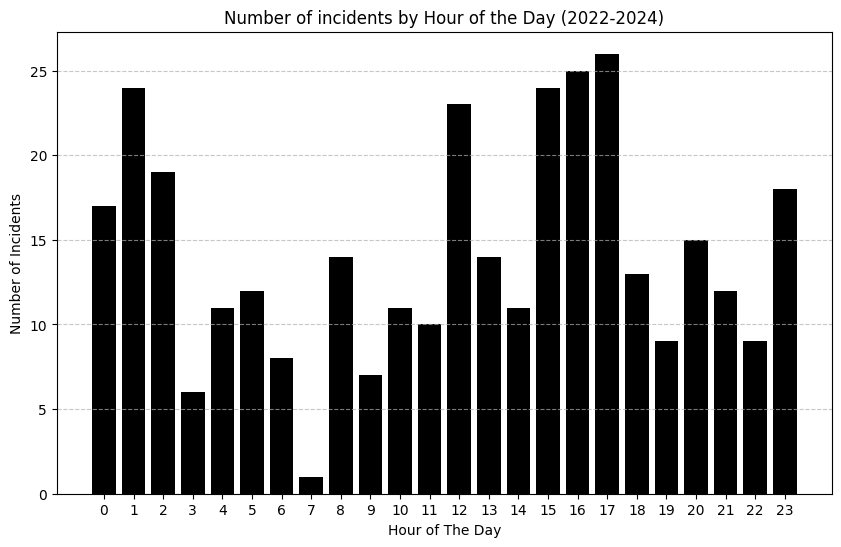

In [6]:
#prasing the dates
def parse_date(date_str):
    try:
        if pd.isna(date_str):
            return None
        return parser.parse(date_str)
    except ValueError:
        return None
    
#filter the data
data['Occured_From_DateTime']=data["Occurred From Date/Time"].apply(parse_date)

# Print the column names to verify
print("Column names in the dataset:")
print(data.columns)

# Function to parse dates
def parse_date(date_str):
    try:
        if pd.isna(date_str) or date_str == "":
            return None
        return parser.parse(date_str)
    except ValueError:
        return None

# Apply the function to parse dates
data['Occurred_From_DateTime'] = data['Occurred From Date/Time'].apply(parse_date)

# Verify the new column
print("Column names after adding 'Occurred_From_DateTime':")
print(data.columns)

# Ensure the column 'Occurred_From_DateTime' exists
if 'Occurred_From_DateTime' not in data.columns:
    print("Error: Column 'Occurred_From_DateTime' does not exist")
else:
    # Filter data for the date range 2022-2024
    filtered_data = data[(data['Occurred_From_DateTime'].notna()) & 
                         (data['Occurred_From_DateTime'].dt.year >= 2022) & 
                         (data['Occurred_From_DateTime'].dt.year <= 2024)]

    # Extract the hour from the Occurred_From_DateTime
    filtered_data['Occurred_Hour'] = filtered_data['Occurred_From_DateTime'].dt.hour

    # Count the number of incidents per hour
    hourly_incidents = filtered_data.groupby('Occurred_Hour').size().reset_index(name='Incident_Count')

    # Identify the hour with the most incidents
    most_incidents_hour = hourly_incidents.loc[hourly_incidents['Incident_Count'].idxmax()]

    # Display the hour with the most incidents
    print(f"The hour with the most incidents is: {most_incidents_hour['Occurred_Hour']} with {most_incidents_hour['Incident_Count']} incidents.")

    #Pllot the number of incidents per hour
    plt.figure(figsize= (10,6))
    plt.bar(hourly_incidents["Occurred_Hour"], hourly_incidents["Incident_Count"], color="Black")
    plt.xlabel("Hour of The Day")
    plt.ylabel("Number of Incidents")
    plt.title("Number of incidents by Hour of the Day (2022-2024)")
    plt.xticks(range(24))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show